In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import cv2

In [12]:
# outliers remover
# https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
def reject_outliers(data, m=2):
    indices = np.nonzero(abs(data - np.mean(data)) < m * np.std(data))
    return indices

In [13]:
def plot_euler_angles_outliers(attitude, fig_num, m=2, axis='y', xaxis='Image Number', title='Title', ifylabel = True):
    """
        @param m: for outliers remover
        @return Declination, Roll
    """
    plt.rcParams["font.family"] = "Times New Roman"

    if xaxis == 'Time (Seconds)':
        time_stamp = attitude[:,0] - attitude[0,0]
    else:
        time_stamp = attitude[:,0]

    euler_z = attitude[:,1]
    euler_y = attitude[:,2]
    euler_x = attitude[:,3]

    if axis == 'z':
        keep_indices = reject_outliers(euler_z, m)
    elif axis == 'y':
        keep_indices = reject_outliers(euler_y, m)
    elif axis == 'x':
        keep_indices = reject_outliers(euler_x, m)
    else:
        print('Wrong Outlier Removing Axis')
        return 0, 0

    plt.figure(num = fig_num, figsize = (3,6)) 

    ax = plt.subplot(3,1,1)
    plt.title(title, fontsize = 12, weight='bold')
    plt.scatter(time_stamp[keep_indices], euler_z[keep_indices], 2, alpha = 1, color='r')
    if ifylabel:
        plt.ylabel('Right Ascension (deg)', fontsize = 10, weight='bold')
    plt.grid(True, color='k', linestyle=':')
    ax.ticklabel_format(useOffset=False, style='plain') # turn off scientific notation


    ax = plt.subplot(3,1,2)
    plt.scatter(time_stamp[keep_indices], euler_y[keep_indices], 2, alpha = 1, color='g')
    if ifylabel:
        plt.ylabel('Declination (deg)', fontsize = 10, weight='bold')
    plt.grid(True, color='k', linestyle=':')
    ax.ticklabel_format(useOffset=False, style='plain') # turn off scientific notation

    ax = plt.subplot(3,1,3)
    plt.scatter(time_stamp[keep_indices], euler_x[keep_indices], 2, alpha = 1, color='b')
    if ifylabel:
        plt.ylabel('Roll (deg)', fontsize = 10, weight='bold')
    plt.xlabel(xaxis, fontsize = 10, weight='bold')
    plt.grid(True, color='k', linestyle=':')
    ax.ticklabel_format(useOffset=False, style='plain') # turn off scientific notation

    plt.show()   

    return euler_y[keep_indices], euler_x[keep_indices]

In [14]:
def output_gif(dir, FPS):
    animation_array = np.load(dir+'.npy')
    animation_list = []
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontscale = 0.5
    font_thickness = 1
    white_bgr = (255, 255, 255)
    org = (5, 25) 

    for i in range(animation_array.shape[0]):
        cv2.putText(animation_array[i], f'Frame={i}', org, font, fontscale, white_bgr, font_thickness, cv2.LINE_AA)

        animation_list.append(cv2.cvtColor(animation_array[i], cv2.COLOR_BGR2RGB))
    imageio.mimsave(dir+'.gif', animation_list, fps=FPS, loop=0) # loop=0 for infinite loop

In [15]:
def output_gif_truncate(dir, FPS, start=0, stop=-1):
    animation_array = np.load(dir+'.npy')[start:stop]
    animation_list = []
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontscale = 0.5
    font_thickness = 1
    white_bgr = (255, 255, 255)
    org = (5, 25) 

    for i in range(animation_array.shape[0]):
        cv2.putText(animation_array[i], f'Frame={i}', org, font, fontscale, white_bgr, font_thickness, cv2.LINE_AA)

        animation_list.append(cv2.cvtColor(animation_array[i], cv2.COLOR_BGR2RGB))
    imageio.mimsave(dir+'.gif', animation_list, fps=FPS, loop=0) # loop=0 for infinite loop

In [12]:
# TEST
animation_array = np.load('../star_tracker_simulator_detect/saved_results/animation_NN_156.npy')
FPS=1
animation_list = []
font = cv2.FONT_HERSHEY_SIMPLEX
fontscale = 0.5
font_thickness = 1
white_bgr = (255, 255, 255)
org = (5, 25) 

for i in range(animation_array.shape[0]):
    cv2.putText(animation_array[i], f'Frame={i}', org, font, fontscale, white_bgr, font_thickness, cv2.LINE_AA)

    animation_list.append(cv2.cvtColor(animation_array[i], cv2.COLOR_BGR2RGB))
imageio.mimsave('../star_tracker_simulator_detect/saved_results/test.gif', animation_list, fps=FPS, loop=0) # loop=0 for infinite loop

# 1 Neural Net

## 1.1 Test 4

### 1.1.1 ELUNet Batch=10 Ep=50

In [11]:
attitude_NN_4_1 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet/attitude_NN_634.npy') 

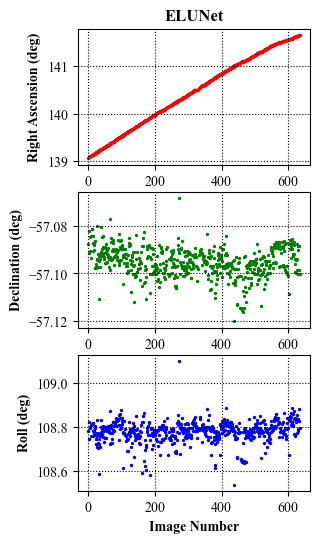

standard deviation Declination = 22.167811278831966 arcsec
standard deviation Roll = 180.68127632222954 arcsec


In [12]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_4_1, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')


In [118]:
dir = '../star_tracker_simulator_detect/saved_results/Test4_ELUNet/animation_NN_634'
output_gif(dir, 30)

### 1.1.2 Mobile UNet Batch=10 Ep=50

In [134]:
attitude_NN_4_2 = np.load('../star_tracker_simulator_detect/saved_results/Test4_MobileUNet/attitude_NN_634.npy') 

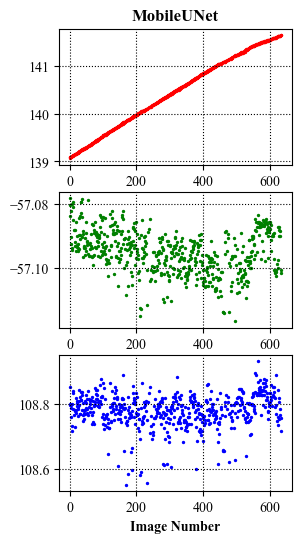

standard deviation Declination = 24.187071626502014 arcsec
standard deviation Roll = 185.37830445625085 arcsec


In [137]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_4_2, 1, m=5, axis = 'y', title='MobileUNet', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 1.1.3 ELUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction

In [115]:
attitude_NN_4_3 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet_Dist/attitude_NN_634.npy') 

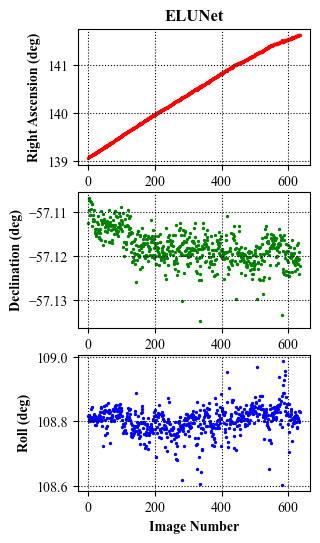

standard deviation Declination = 13.792284358790488 arcsec
standard deviation Roll = 151.89681686726286 arcsec


In [120]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_4_3, 1, m=5, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [121]:
dir = '../star_tracker_simulator_detect/saved_results/Test4_ELUNet_Dist/animation_NN_634'
output_gif(dir, 30)

### 1.1.4 ELUNet Batch=10 Ep=50 Matlab Calibration without Distortion Correction

In [16]:
attitude_NN_4_4 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet_MatCal/attitude_NN_634.npy') 

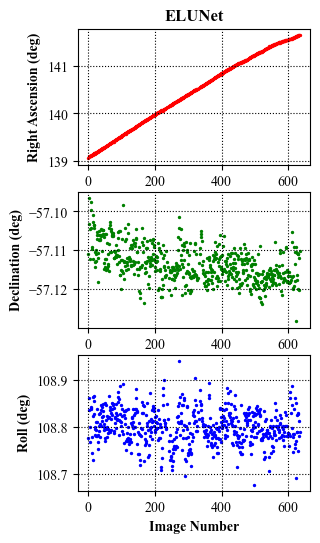

standard deviation Declination = 16.753324782527603 arcsec
standard deviation Roll = 131.7837434725953 arcsec


In [123]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_4_4, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 1.1.5 MobileUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction

In [125]:
attitude_NN_4_5 = np.load('../star_tracker_simulator_detect/saved_results/Test4_MobileUNet_Dist/attitude_NN_634.npy') 

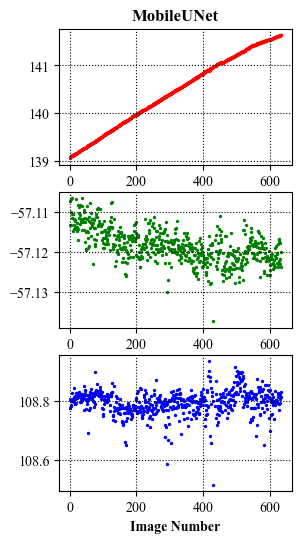

standard deviation Declination = 15.441489153589767 arcsec
standard deviation Roll = 146.8807087424387 arcsec


In [131]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_4_5, 1, m=10, axis = 'y', title='MobileUNet', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [127]:
dir = '../star_tracker_simulator_detect/saved_results/Test4_MobileUNet_Dist/animation_NN_634'
output_gif(dir, 30)

## 1.2 Test 3 (First Car Test)

### 1.2.1 ELUNet Batch=10 Ep=50

In [39]:
attitude_NN_3_1 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet/attitude_NN_673.npy') 

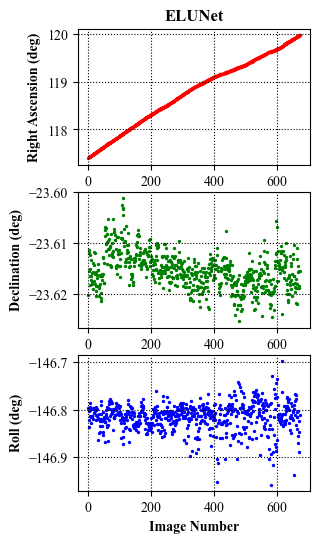

standard deviation Declination = 13.116354481297552 arcsec
standard deviation Roll = 104.21188878095703 arcsec


In [40]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_3_1, 1, m=1, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [48]:
dir = '../star_tracker_simulator_detect/saved_results/Test3_ELUNet/animation_NN_673'
output_gif(dir, 30)

### 1.2.2 Mobile UNet Batch=10 Ep=50

In [130]:
attitude_NN_3_2 = np.load('../star_tracker_simulator_detect/saved_results/Test3_MobileUNet/attitude_NN_673.npy') 

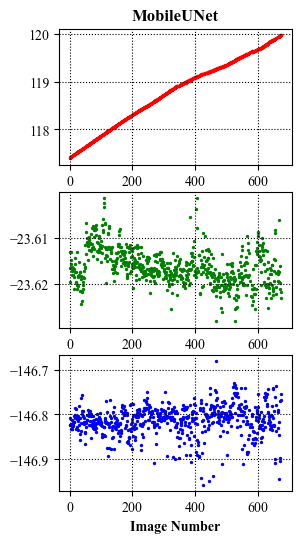

standard deviation Declination = 14.113243944348827 arcsec
standard deviation Roll = 120.45382462609618 arcsec


In [133]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_3_2, 1, m=5, axis = 'y', title='MobileUNet', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 1.2.3 ELUNet Batch=10 Ep=50 Matlab Calibration

In [5]:
attitude_NN_3_3 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet_MatCal/attitude_NN_673.npy') 

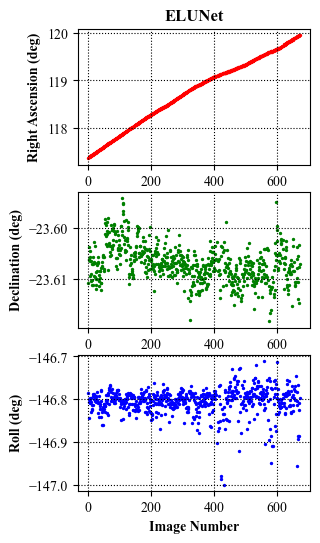

standard deviation Declination = 12.907244690208536 arcsec
standard deviation Roll = 109.97755302076888 arcsec


In [128]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_3_3, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 1.2.4 ELUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction

In [68]:
attitude_NN_3_4 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet_Dist/attitude_NN_673.npy') 

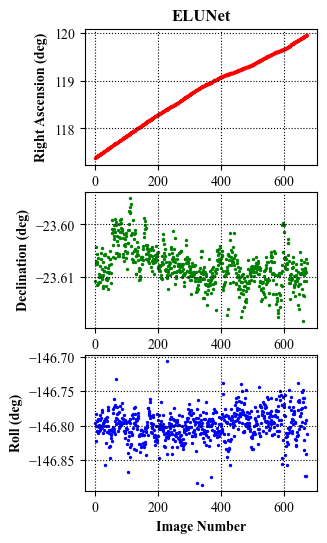

standard deviation Declination = 12.92208001870333 arcsec
standard deviation Roll = 76.95022083485505 arcsec


In [71]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_3_4, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [76]:
dir = '../star_tracker_simulator_detect/saved_results/Test3_ELUNet_Dist/animation_NN_673'
output_gif(dir, 30)

### 1.2.5 MobileUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction

In [80]:
attitude_NN_3_5 = np.load('../star_tracker_simulator_detect/saved_results/Test3_MobileUNet_Dist/attitude_NN_673.npy') 

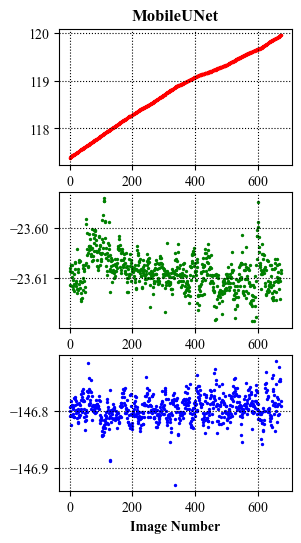

standard deviation Declination = 12.925448634117702 arcsec
standard deviation Roll = 81.48833894533955 arcsec


In [91]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_3_5, 1, m=4.6, axis = 'x', title='MobileUNet', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

## 1.3 Test 2 (Stray light)

### 1.3.1 ELUNet Batch=10 Ep=50

In [8]:
attitude_NN_2_1 = np.load('../star_tracker_simulator_detect/saved_results/Test2_ELUNet/attitude_NN_717.npy') 

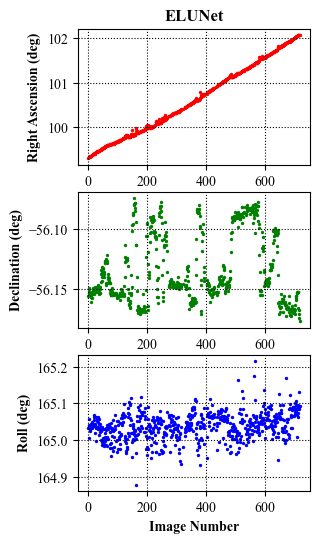

standard deviation Declination = 102.97931778884089 arcsec
standard deviation Roll = 132.2556220530243 arcsec


In [9]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_2_1, 1, m=1, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [10]:
dir = '../star_tracker_simulator_detect/saved_results/Test2_ELUNet/animation_NN_717'
output_gif(dir, 15)

## 1.4 Test 1

### 1.4.1 ELUNet Batch=10 Ep=50

In [122]:
attitude_NN_1_1 = np.load('../star_tracker_simulator_detect/saved_results/Test1_ELUNet/attitude_NN_775.npy') 

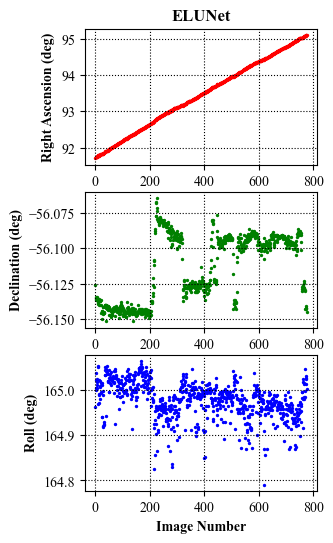

standard deviation Declination = 84.33796725374633 arcsec
standard deviation Roll = 147.06930746801547 arcsec


In [123]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_1_1, 1, m=1, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

## 1.5 Test 5 (Japan House)

### 1.5.1 ELUNet Batch=10 Ep=50

In [124]:
attitude_NN_5_1 = np.load('../star_tracker_simulator_detect/saved_results/Test5_ELUNet/attitude_NN_140.npy') 

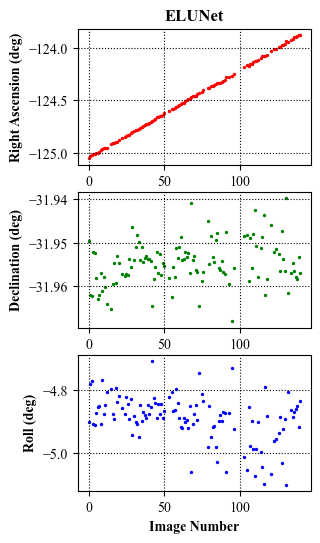

standard deviation Declination = 18.299325077963676 arcsec
standard deviation Roll = 267.89288847840874 arcsec


In [125]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_5_1, 1, m=1, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [126]:
dir = '../star_tracker_simulator_detect/saved_results/Test5_ELUNet/animation_NN_140'
output_gif(dir, 5)

## 1.6 March 16 

### 1.6.1 ELUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction
Tolerance = 0.03

In [15]:
attitude_NN_6_1 = np.load('../star_tracker_simulator_detect/saved_results/March16_ELUNet/attitude_NN_307.npy') 

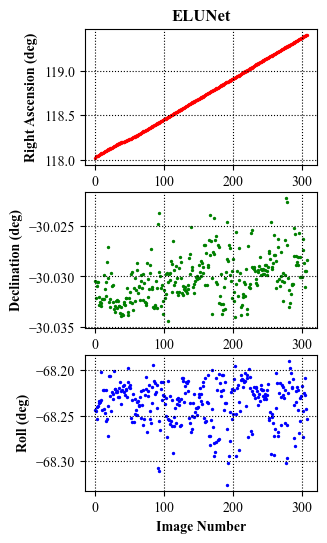

standard deviation Declination = 8.070365822040358 arcsec
standard deviation Roll = 85.85075897215654 arcsec


In [19]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_6_1, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [ ]:
dir = '../star_tracker_simulator_detect/saved_results/Test3_ELUNet_Dist/animation_NN_673'
output_gif(dir, 30)

### 1.6.2 MobileUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction
Tolerance = 0.03

In [28]:
attitude_NN_6_2 = np.load('../star_tracker_simulator_detect/saved_results/March16_MobileUNet/attitude_NN_307.npy') 

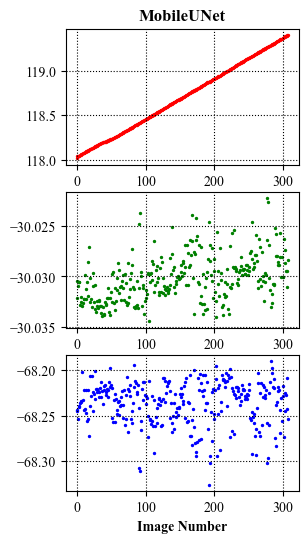

standard deviation Declination = 8.070365664506859 arcsec
standard deviation Roll = 85.85075804050923 arcsec


In [29]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_6_2, 1, m=10, axis = 'y', title='MobileUNet', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

## 1.7 March 16 Stray light

### 1.7.1 ELUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction
Tolerance = 0.03

In [16]:
attitude_NN_7_1 = np.load('../star_tracker_simulator_detect/saved_results/March16Straylight_ELUNet/attitude_NN_376.npy') 

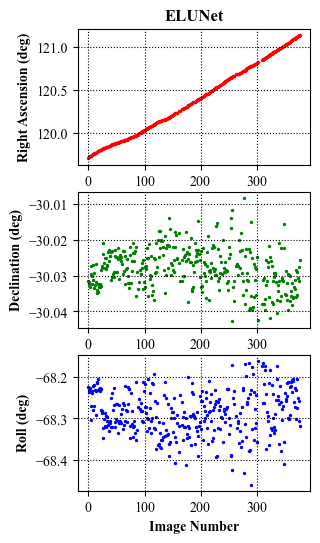

standard deviation Declination = 20.2479539090658 arcsec
standard deviation Roll = 191.7292420648973 arcsec


In [17]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_7_1, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [ ]:
dir = '../star_tracker_simulator_detect/saved_results/March16Straylight_ELUNet/animation_NN_376'
output_gif(dir, 30)

### 1.7.2 MobileUNet Batch=10 Ep=50 Matlab Calibration with Distortion Correction
Tolerance = 0.03

In [34]:
attitude_NN_7_2 = np.load('../star_tracker_simulator_detect/saved_results/March16Straylight_MobileUNet/attitude_NN_376.npy') 

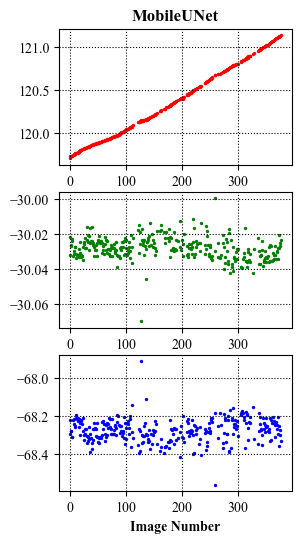

standard deviation Declination = 23.094811630436933 arcsec
standard deviation Roll = 216.96417689737638 arcsec


In [43]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_7_2, 1, m=7, axis = 'x', title='MobileUNet', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

## 1.8 March 16 Failure

### 1.8.1 Catalog 6, Tolerance=0.03

In [8]:
attitude_NN_8_1 = np.load('../star_tracker_simulator_detect/saved_results/March16Failure_ELUNet6/attitude_NN_432.npy') 

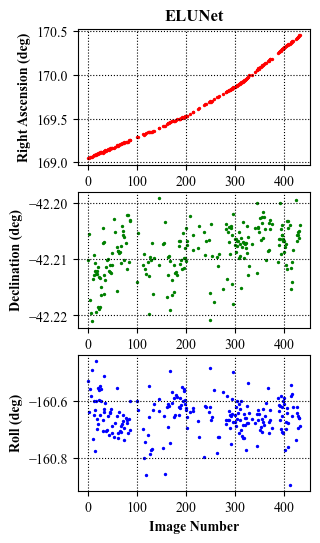

standard deviation Declination = 15.935866644013839 arcsec
standard deviation Roll = 236.74279151513596 arcsec


In [12]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_8_1, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 1.8.2 Catalog 6.1, Tolerance=0.03

In [13]:
attitude_NN_8_2 = np.load('../star_tracker_simulator_detect/saved_results/March16Failure_ELUNet6.1/attitude_NN_432.npy') 

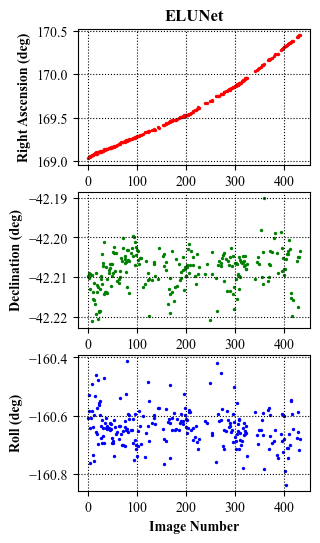

standard deviation Declination = 17.03788513400963 arcsec
standard deviation Roll = 235.85867431695488 arcsec


In [14]:
Dec, Roll = plot_euler_angles_outliers(attitude_NN_8_2, 1, m=10, axis = 'y', title='ELUNet', ifylabel=True)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

## 1.9 March 16 360 Test
ELUNet, Tolerance = 0.03, 500ms exposure time

In [7]:
dir = '../star_tracker_simulator_detect/saved_results/March16_360_ELUNet/animation_NN_625'
output_gif(dir, 10)

## 1.10 March 16 Moon

In [11]:
# ELUNet
dir = '../star_tracker_simulator_detect/saved_results/March16_Moon/animation_NN_106'
output_gif_truncate(dir, 5, start=25, stop=80)

# 2 Baseline Methods

## 2.1 Test 3 (First Car Test)

### 2.1.1 Erosion Dilation + Gaussian Grid
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [70]:
attitude_baseline_3_1 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionGauss/attitude_baseline_673.npy') 

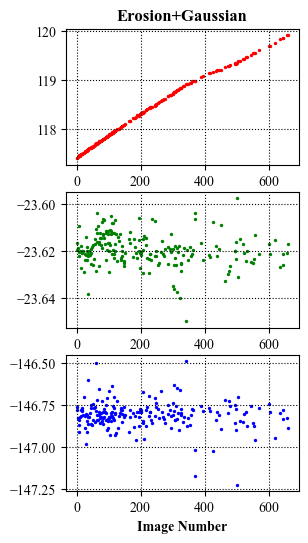

standard deviation Declination = 24.87520523352534 arcsec
standard deviation Roll = 294.04280712322804 arcsec


In [73]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_3_1, 1, m=10, axis = 'y', title='Erosion+Gaussian', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 2.1.2 Erosion Dilation + COM
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [5]:
attitude_baseline_3_2 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionCoM/attitude_baseline_673.npy') 

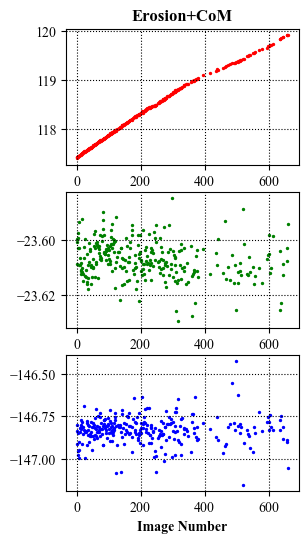

standard deviation Declination = 24.2840735616185 arcsec
standard deviation Roll = 288.43830104186395 arcsec


In [6]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_3_2, 1, m=3, axis = 'z', title='Erosion+CoM', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [67]:
dir = '../star_tracker_simulator_detect/saved_results/Test3_ErosionCoM/animation_baseline_673'
output_gif(dir, 30)

### 2.1.3 Erosion Dilation + Gaussian Grid Matlab Calibration with Distortion Correction
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [45]:
attitude_baseline_3_3 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionGauss_Dist/attitude_baseline_673.npy') 

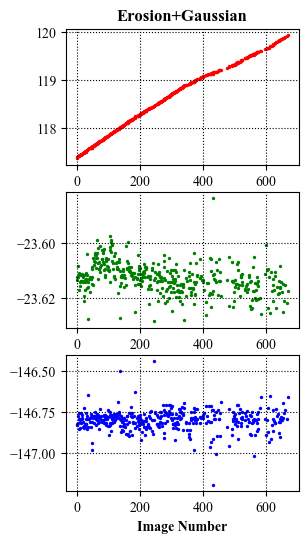

standard deviation Declination = 19.837966179753817 arcsec
standard deviation Roll = 221.0945397621726 arcsec


In [65]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_3_3, 1, m=0.18, axis = 'x', title='Erosion+Gaussian', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 2.1.4 Erosion Dilation + COM Matlab Calibration with Distortion Correction
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [7]:
attitude_baseline_3_4 = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionCoM_Dist/attitude_baseline_673.npy') 

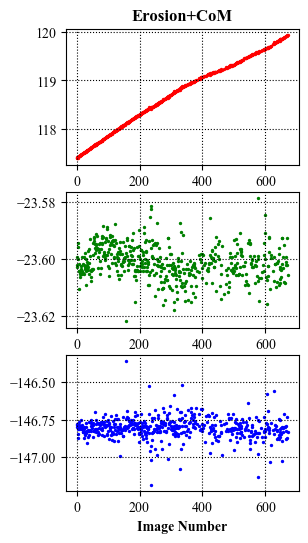

standard deviation Declination = 21.255006385673358 arcsec
standard deviation Roll = 251.71826795664316 arcsec


In [11]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_3_4, 1, m=10, axis = 'y', title='Erosion+CoM', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [75]:
dir = '../star_tracker_simulator_detect/saved_results/Test3_ErosionCoM_Dist/animation_baseline_673'
output_gif(dir, 30)

## 2.2 Test 2 (Stray Light)

### 2.2.1 Erosion Dilation + COM
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [29]:
dir = '../star_tracker_simulator_detect/saved_results/Test2_ErosionCoM/animation_baseline_717'
output_gif(dir, 15,)

## 2.3 Test 4 (Second Car Test)

### 2.3.1 Erosion Dilation + Gaussian Grid
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [73]:
attitude_baseline_4_1 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionGauss/attitude_baseline_634.npy') 

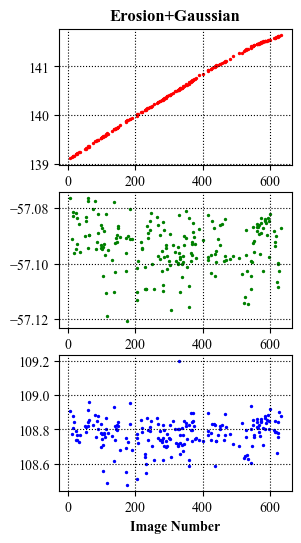

standard deviation Declination = 32.03006684977643 arcsec
standard deviation Roll = 327.9630290313157 arcsec


In [74]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_4_1, 1, m=1, axis = 'y', title='Erosion+Gaussian', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [119]:
dir = '../star_tracker_simulator_detect/saved_results/Test4_ErosionGauss/animation_baseline_634'
output_gif(dir, 30)

### 2.3.2 Erosion Dilation + COM
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [92]:
attitude_baseline_4_2 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionCoM/attitude_baseline_634.npy') 

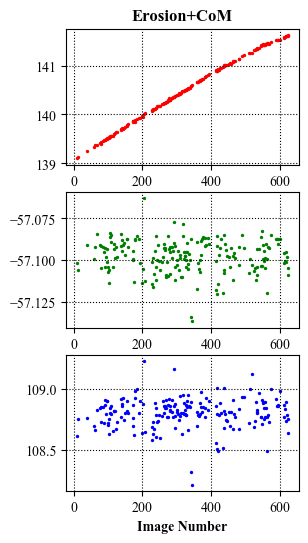

standard deviation Declination = 35.35135755488574 arcsec
standard deviation Roll = 441.4567774594178 arcsec


In [93]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_4_2, 1, m=1, axis = 'y', title='Erosion+CoM', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 2.3.3 Erosion Dilation + COM Matlab Calibration with Distortion Correction
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [111]:
attitude_baseline_4_3 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionCoM_Dist/attitude_baseline_634.npy') 

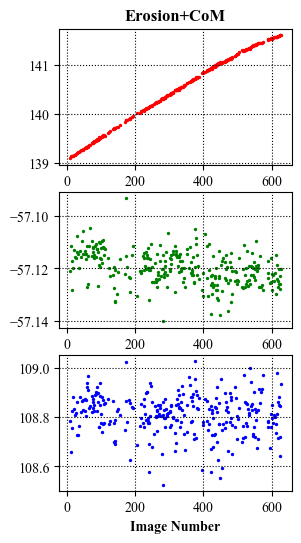

standard deviation Declination = 22.987754211707383 arcsec
standard deviation Roll = 290.8409438602156 arcsec


In [114]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_4_3, 1, m=2.5, axis = 'x', title='Erosion+CoM', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 2.3.4 Erosion Dilation + Gaussian Grid Matlab Calibration with Distortion Correction
gaussian_sigma=5, average_window_size=10, detection_sigma=2.2, pixel_area=4

In [108]:
attitude_baseline_4_4 = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionGauss_Dist/attitude_baseline_634.npy') 

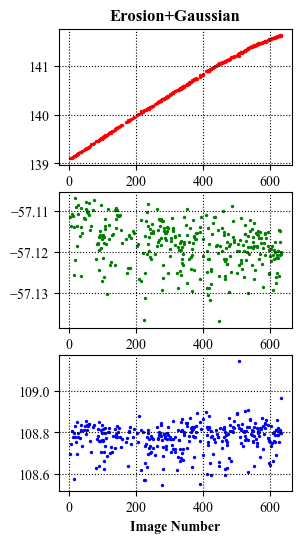

standard deviation Declination = 19.34112698318174 arcsec
standard deviation Roll = 253.33501847139883 arcsec


In [110]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_4_4, 1, m=3, axis = 'y', title='Erosion+Gaussian', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

In [124]:
dir = '../star_tracker_simulator_detect/saved_results/Test4_ErosionGauss_Dist/animation_baseline_634'
output_gif(dir, 30)

## 2.4 Test 5 (Japan House)

### 2.4.1 Erosion Dilation + Gausian
gaussian_sigma=5, average_window_size=10, detection_sigma=2.5, pixel_area=4

In [129]:
attitude_baseline_5_1 = np.load('../star_tracker_simulator_detect/saved_results/Test5_ErosionGauss/attitude_baseline_140.npy') 

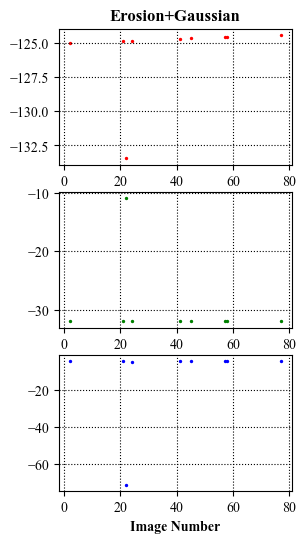

standard deviation Declination = 23818.2977931116 arcsec
standard deviation Roll = 74729.29183260782 arcsec


In [131]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_5_1, 1, m=0.8, axis = 'y', title='Erosion+Gaussian', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

### 2.4.2 Erosion Dilation + COM
gaussian_sigma=5, average_window_size=10, detection_sigma=2.5, pixel_area=4

In [127]:
attitude_baseline_5_2 = np.load('../star_tracker_simulator_detect/saved_results/Test5_ErosionCoM/attitude_baseline_140.npy') 

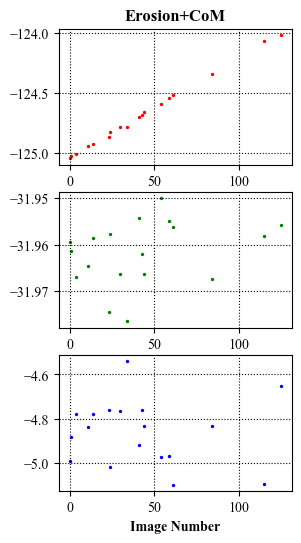

standard deviation Declination = 24.489093846288764 arcsec
standard deviation Roll = 516.2460047571749 arcsec


In [128]:
Dec, Roll = plot_euler_angles_outliers(attitude_baseline_5_2, 1, m=1, axis = 'y', title='Erosion+CoM', ifylabel=False)

print(f'standard deviation Declination = {np.std(Dec)*3600} arcsec')
print(f'standard deviation Roll = {np.std(Roll)*3600} arcsec')

# 3 Identification Rate Comparison

In [10]:
from scipy.ndimage import gaussian_filter1d # for functions that are not smooth inherently

def plot_id_rate(idRate_list, labels_list, window_size):

    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure(figsize = (4,5)) 

    for i in range(len(idRate_list)):
        num_centroids = gaussian_filter1d(idRate_list[i][:,0], window_size)
        num_ids = gaussian_filter1d(idRate_list[i][:,1], window_size)
        my_label = labels_list[i]

        plt.subplot(3,1,1)
        plt.plot(num_centroids, label=my_label, linewidth=0.8)
        plt.ylabel('Avg Centroids', fontsize = 10, weight='bold')
        plt.grid(True, color='k', linestyle=':')
        plt.legend(  loc='upper center', bbox_to_anchor=(0.5, 1.5),
                ncol=2, fancybox=True, shadow=True, fontsize=10) 
        
        plt.subplot(3,1,2)
        plt.plot(num_ids, label=my_label, linewidth=0.8)
        plt.ylabel('Avg IDs', fontsize = 10, weight='bold')
        plt.grid(True, color='k', linestyle=':')
        
        plt.subplot(3,1,3)
        plt.plot(gaussian_filter1d(num_ids/num_centroids, window_size), label=my_label, linewidth=0.8)
        plt.ylabel('Avg ID Rate', fontsize = 10, weight='bold')
        plt.grid(True, color='k', linestyle=':')
        plt.xlabel('Image Number', fontsize = 10, weight='bold')
    plt.savefig('nightSkyTest.pdf')
    plt.show()


## 3.1 Test 3

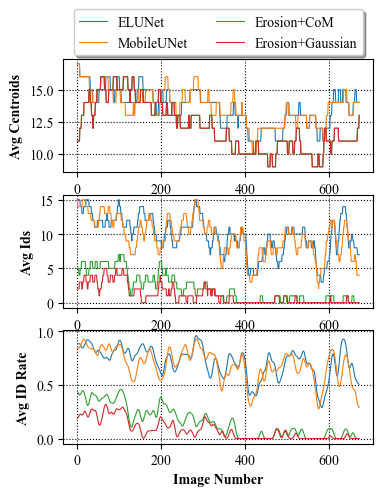

In [109]:
Test3_CoM = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionCoM/id_rate_baseline_673.npy') 
Test3_Gauss = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionGauss/id_rate_baseline_673.npy') 
Test3_MobileUNet = np.load('../star_tracker_simulator_detect/saved_results/Test3_MobileUNet/id_rate_NN_673.npy') 
Test3_ELUNet = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet/id_rate_NN_673.npy') 
plot_id_rate([Test3_ELUNet, Test3_MobileUNet, Test3_CoM, Test3_Gauss, ], ['ELUNet', 'MobileUNet', 'Erosion+CoM', 'Erosion+Gaussian', ], window_size=3)

## 3.2 Test 2

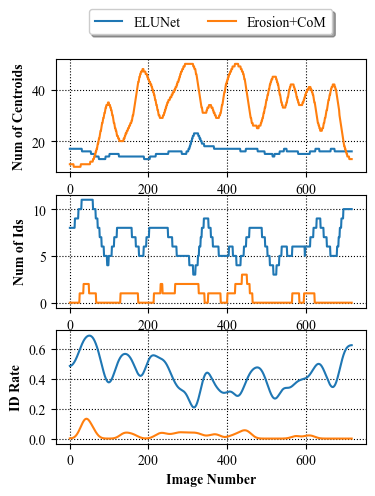

In [28]:
Test2_CoM = np.load('../star_tracker_simulator_detect/saved_results/Test2_ErosionCoM/id_rate_baseline_717.npy') 
Test2_ELUNet = np.load('../star_tracker_simulator_detect/saved_results/Test2_ELUNet/id_rate_NN_717.npy') 
plot_id_rate([Test2_ELUNet, Test2_CoM ], ['ELUNet', 'Erosion+CoM'], window_size=10)

## 3.3 Test 4

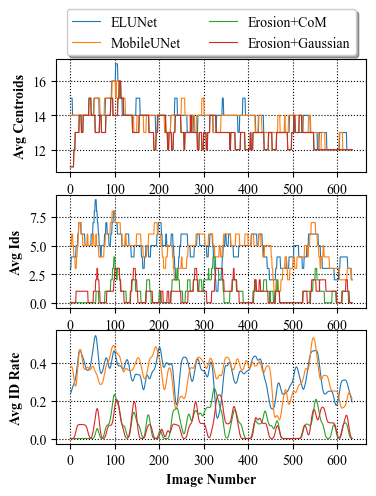

In [111]:
Test4_CoM = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionCoM/id_rate_baseline_634.npy') 
Test4_Gauss = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionGauss/id_rate_baseline_634.npy') 
Test4_MobileUNet = np.load('../star_tracker_simulator_detect/saved_results/Test4_MobileUNet/id_rate_NN_634.npy') 
Test4_ELUNet = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet/id_rate_NN_634.npy') 
plot_id_rate([Test4_ELUNet, Test4_MobileUNet, Test4_CoM, Test4_Gauss], ['ELUNet', 'MobileUNet', 'Erosion+CoM', 'Erosion+Gaussian'], window_size=3)

## 3.4 Test 3 Matlab Cal

In [6]:
Test3_ELUNet = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet/id_rate_NN_673.npy') 
Test3_ELUNet_Cal = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet_MatCal/id_rate_NN_673.npy') 
Test3_ELUNet_CalDist = np.load('../star_tracker_simulator_detect/saved_results/Test3_ELUNet_Dist/id_rate_NN_673.npy') 

Test3_MobileUNet_Dist = np.load('../star_tracker_simulator_detect/saved_results/Test3_MobileUNet_Dist/id_rate_NN_673.npy') 

Test3_Gauss = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionGauss/id_rate_baseline_673.npy') 
Test3_Gauss_Dist = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionGauss_Dist/id_rate_baseline_673.npy') 

Test3_CoM_Dist = np.load('../star_tracker_simulator_detect/saved_results/Test3_ErosionCoM_Dist/id_rate_baseline_673.npy') 

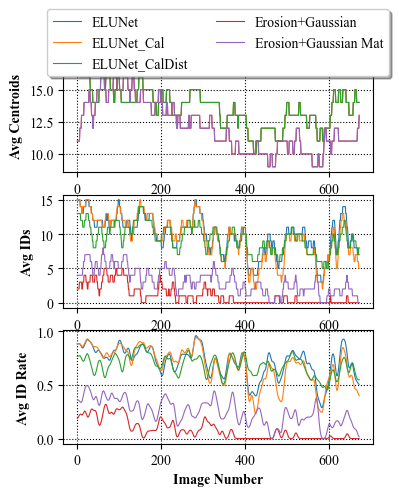

In [73]:
plot_id_rate([Test3_ELUNet, Test3_ELUNet_Cal, Test3_ELUNet_CalDist, Test3_Gauss, Test3_Gauss_Dist], ['ELUNet', 'ELUNet_Cal', 'ELUNet_CalDist', 'Erosion+Gaussian', 'Erosion+Gaussian Mat'], window_size=3)

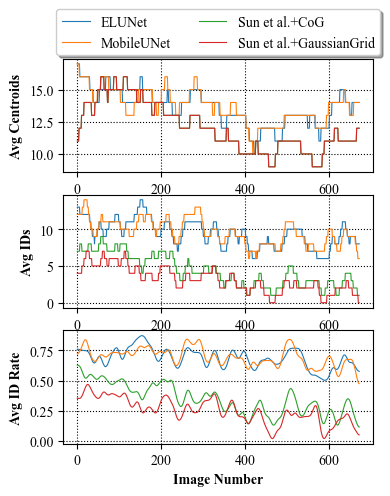

In [11]:
plot_id_rate([Test3_ELUNet_CalDist, Test3_MobileUNet_Dist, Test3_CoM_Dist, Test3_Gauss_Dist], ['ELUNet', 'MobileUNet', 'Sun et al.+CoG', 'Sun et al.+GaussianGrid'], window_size=5)

## 3.5 Test 4 Matlab Cal

In [129]:
Test4_ELUNet = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet/id_rate_NN_634.npy') 
Test4_ELUNet_Cal = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet_MatCal/id_rate_NN_634.npy') 

Test4_ELUNet_CalDist = np.load('../star_tracker_simulator_detect/saved_results/Test4_ELUNet_Dist/id_rate_NN_634.npy') 

Test4_CoM_Dist = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionCoM_Dist/id_rate_baseline_634.npy') 

Test4_Gauss_Dist = np.load('../star_tracker_simulator_detect/saved_results/Test4_ErosionGauss_Dist/id_rate_baseline_634.npy') 

Test4_MobileUNet_Dist = np.load('../star_tracker_simulator_detect/saved_results/Test4_MobileUNet_Dist/id_rate_NN_634.npy') 


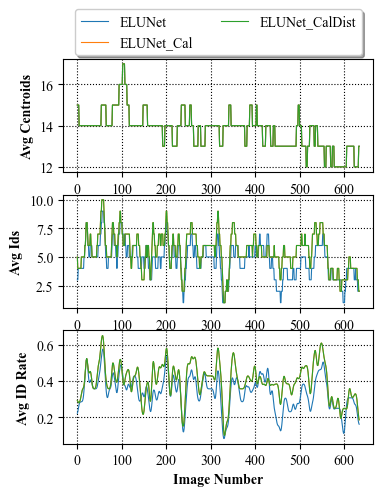

In [40]:
plot_id_rate([Test4_ELUNet, Test4_ELUNet_Cal, Test4_ELUNet_CalDist], ['ELUNet', 'ELUNet_Cal', 'ELUNet_CalDist'], window_size=2)

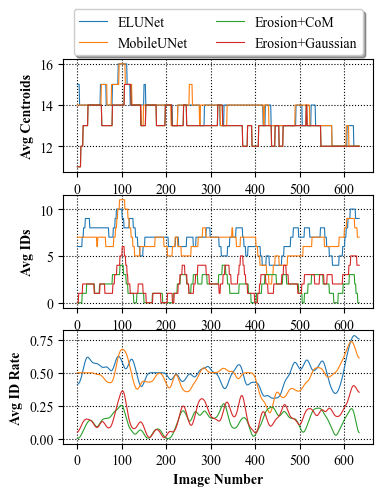

In [130]:
plot_id_rate([Test4_ELUNet_CalDist, Test4_MobileUNet_Dist, Test4_CoM_Dist, Test4_Gauss_Dist], ['ELUNet', 'MobileUNet', 'Erosion+CoM', 'Erosion+Gaussian'], window_size=5)

## 3.6 Catalog 6 vs Catalog 6.1

In [6]:
Catalog6 = np.load('../star_tracker_simulator_detect/saved_results/March16Failure_ELUNet6/id_rate_NN_432.npy') 
Catalog61 = np.load('../star_tracker_simulator_detect/saved_results/March16Failure_ELUNet6.1/id_rate_NN_432.npy') 


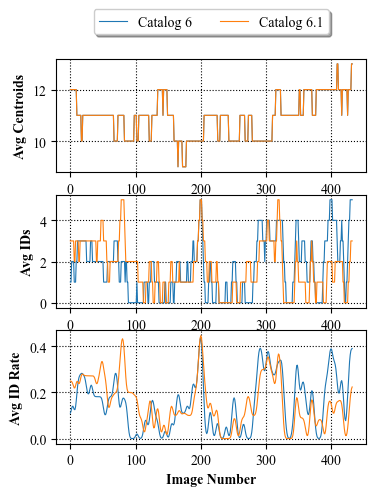

In [7]:
plot_id_rate([Catalog6, Catalog61], ['Catalog 6', 'Catalog 6.1'], window_size=2)

## 3.7 Stray light

In [44]:
ELUNet = np.load('../star_tracker_simulator_detect/saved_results/March16_ELUNet/id_rate_NN_307.npy') 
ELUNet_stray = np.load('../star_tracker_simulator_detect/saved_results/March16Straylight_ELUNet/id_rate_NN_376.npy') 

MobileUNet =  np.load('../star_tracker_simulator_detect/saved_results/March16_MobileUNet/id_rate_NN_307.npy') 
MobileUNet_stray = np.load('../star_tracker_simulator_detect/saved_results/March16Straylight_MobileUNet/id_rate_NN_376.npy') 

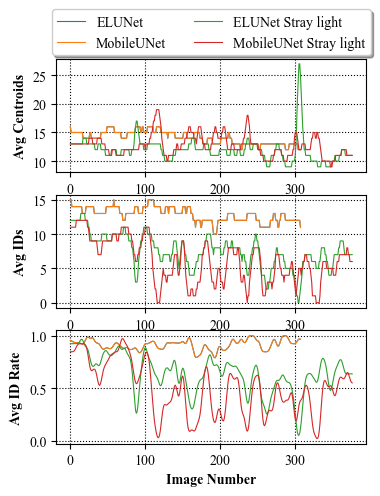

In [46]:
plot_id_rate([ELUNet, MobileUNet, ELUNet_stray, MobileUNet_stray], ['ELUNet', 'MobileUNet', 'ELUNet Stray light', 'MobileUNet Stray light'], window_size=2)